# Training & Evaluation

* In this notebook we are going to a CNN to categorize handwritten digits using the `MNIST Handwritten Digits` dataset.
* We have read the dataset and split it into `train` / `validate` and `test` set in [00_data_access.ipynb](./00_data_access.ipynb) notebook. 
* In the training pipeline we are going to apply `RandomTranslation`, `RandomZoom` and `RandomRotation` data augmentation techniques. 

## Importing Libraries

In [1]:
from pathlib import Path
from sklearn.datasets import fetch_openml
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt


2025-07-10 14:41:25.936015: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752183685.951268   45832 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752183685.955964   45832 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1752183685.968248   45832 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1752183685.968264   45832 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1752183685.968266   45832 computation_placer.cc:177] computation placer alr

## Constants

In [2]:
data_dir = Path("..","data")
models_dir = Path("..","models")

## Read Data

In [3]:
mnist_train_set = pd.read_csv(Path(data_dir,"train_set.csv"))
mnist_val_set = pd.read_csv(Path(data_dir,"val_set.csv"))
mnist_train_set.shape,mnist_val_set.shape

((56700, 785), (6300, 785))

In [4]:
## lets split this into X_train, y_train
X_train = mnist_train_set.drop(columns=["class"])
y_train = mnist_train_set["class"]

X_val = mnist_val_set.drop(columns=["class"])
y_val = mnist_val_set["class"]

X_train.shape,y_train.shape,X_val.shape,y_val.shape

((56700, 784), (56700,), (6300, 784), (6300,))

In [5]:
X_train.head(2)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
y_train.head(2)

0    0
1    4
Name: class, dtype: int64

## Experiment 1 - Baseline Model
* For our first experiment we are going to create a simple sequential model with 3 convolution blocks with max pooling in between and finally 2 dense layers with last one classifying the digits from 0 to 9

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.RandomTranslation(
        height_factor=0.2, width_factor=0.2, fill_value=0.0, fill_mode="constant", seed=42),

    tf.keras.layers.RandomZoom(
        height_factor=0.2, width_factor=0.2, fill_value=0.0, fill_mode="constant", seed=42),

    tf.keras.layers.RandomRotation(
        factor=0.1, fill_value=0.0, fill_mode="constant", seed=42),

    tf.keras.layers.Rescaling(scale=1./255),

    tf.keras.layers.Conv2D(filters=8, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation="softmax")
])

I0000 00:00:1751301047.843752  242100 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2e:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1751301048.266175  242100 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2e:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1751301048.266262  242100 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2e:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1751301048.273343  242100 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2e:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1751301048.273420  242100 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2e:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [10]:
## convert df to tensor
X_train_tensor = tf.convert_to_tensor(X_train)
X_train_tensor = tf.reshape(X_train_tensor,shape=(-1,28,28,1))

y_train_tensor = tf.convert_to_tensor(y_train)
# y_train_tensor = tf.reshape(y_train_tensor,shape=(-1,28,28,1))

X_val_tensor = tf.convert_to_tensor(X_val)
X_val_tensor = tf.reshape(X_val_tensor,shape=(-1,28,28,1))

y_val_tensor = tf.convert_to_tensor(y_val)

In [11]:
epochs=20

history = model.fit(
  x=X_train_tensor,
  y=y_train_tensor,
  validation_data=(X_val_tensor,y_val_tensor),
  epochs=epochs
)

Epoch 1/20


2025-06-30 09:30:52.130915: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90201
W0000 00:00:1751301052.331759  252954 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1751301052.396506  252954 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1751301052.397320  252954 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1751301052.398038  252954 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1751301052.408244  252954 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1751301052.409062  252954 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1751301052.409832  252954 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1751301052.417575  252954 gpu_

1770/1772 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6244 - loss: 1.1065

W0000 00:00:1751301075.277496  252950 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1751301075.281408  252950 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1751301075.285158  252950 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1751301075.288925  252950 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1751301075.292660  252950 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1751301075.296427  252950 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1751301075.300220  252950 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1751301075.303980  252950 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1751301075.307775  252950 gp

1772/1772 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6245 - loss: 1.1060

W0000 00:00:1751301075.480218  252954 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1751301075.482330  252954 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1751301075.484700  252954 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1751301075.487028  252954 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1751301075.490215  252954 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1751301075.492387  252954 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1751301075.494515  252954 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1751301075.496759  252954 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1751301075.499715  252954 gp

1772/1772 ━━━━━━━━━━━━━━━━━━━━ 27s 13ms/step - accuracy: 0.6246 - loss: 1.1058 - val_accuracy: 0.9443 - val_loss: 0.1882
Epoch 2/20
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9027 - loss: 0.3107 - val_accuracy: 0.9508 - val_loss: 0.1482
Epoch 3/20
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.9312 - loss: 0.2231 - val_accuracy: 0.9603 - val_loss: 0.1399
Epoch 4/20
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9430 - loss: 0.1764 - val_accuracy: 0.9641 - val_loss: 0.1147
Epoch 5/20
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.9514 - loss: 0.1563 - val_accuracy: 0.9697 - val_loss: 0.0975
Epoch 6/20
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.9546 - loss: 0.1420 - val_accuracy: 0.9684 - val_loss: 0.1074
Epoch 7/20
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.9594 - loss: 0.1328 - val_accuracy: 0.9763 - val_loss: 0.0794
Epoch 8/20
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.9640 - loss: 0.11

In [12]:
history.history

{'accuracy': [0.7804232835769653,
  0.9125044345855713,
  0.9345149993896484,
  0.9450617432594299,
  0.9528924226760864,
  0.9559082984924316,
  0.9599471092224121,
  0.9634391665458679,
  0.9647089838981628,
  0.9670899510383606,
  0.9675308465957642,
  0.9699294567108154,
  0.9700705409049988,
  0.9716225862503052,
  0.9707230925559998,
  0.9722574949264526,
  0.9736155271530151,
  0.9737213253974915,
  0.9747619032859802,
  0.9742327928543091],
 'loss': [0.6774248480796814,
  0.27889585494995117,
  0.2107143998146057,
  0.1734590083360672,
  0.1504470854997635,
  0.13960608839988708,
  0.129999041557312,
  0.1174689456820488,
  0.11161879450082779,
  0.10374990850687027,
  0.10322052240371704,
  0.09621183574199677,
  0.094134621322155,
  0.08949451893568039,
  0.09241855144500732,
  0.08799027651548386,
  0.08470923453569412,
  0.08211804926395416,
  0.08042232692241669,
  0.08012830466032028],
 'val_accuracy': [0.9442856907844543,
  0.9507936239242554,
  0.9603174328804016,
  0.9

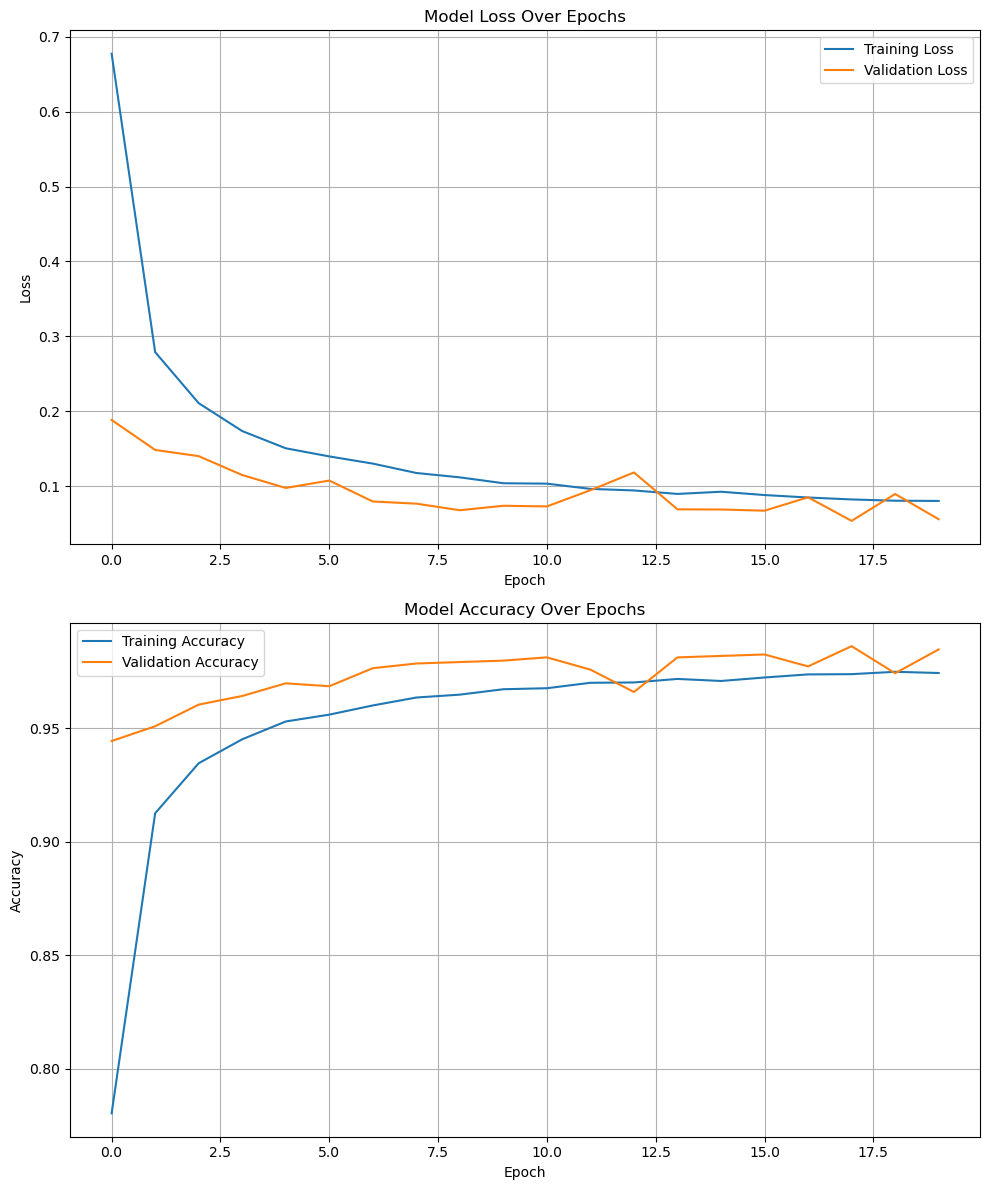

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume 'history' is the object returned from model.fit()
# Create a DataFrame from the history for easy plotting (optional but nice)
history_df = pd.DataFrame(history.history)

# Create a figure with two subplots, one on top of the other
# Hint: plt.subplots(nrows, ncols, figsize)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# --- Plot Loss ---
# Hint: Use ax1.plot() for both training and validation loss
# You can get the epoch numbers using history_df.index
ax1.plot(history_df.index, history_df['loss'], label='Training Loss')
ax1.plot(history_df.index, history_df['val_loss'], label='Validation Loss')
ax1.set_title('Model Loss Over Epochs')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid(True)

# --- Plot Accuracy ---
# Hint: Do the same for accuracy on ax2
ax2.plot(history_df.index, history_df['accuracy'], label='Training Accuracy')
ax2.plot(history_df.index, history_df['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Model Accuracy Over Epochs')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()
ax2.grid(True)

# Show the plots
plt.tight_layout() # Adjusts plots to prevent them from overlapping
plt.show()

* The training loss seems to be constantly decreasing and so is validation loss, there was a spike in validation loss in epoch 10 but over all its less than training loss and have downward trend

* For accuracy it seems overall accuracy is increasing every epoch, again there was a drop in accuracy at epoch 10, but overall validation accuracy is 0.2 points more than training and am seeing an upwards trends.



I want to try 2 experiments, in following order


1. Train for more epochs, I trained for 20. epochs but want to see if we continue training longer does it improve.

2. Add more layers, although I don't see any proof that the model is too simple for the data set I still want to add more layers to see if they learn certain features that other layers couldn't.

## Experiment 2 - Increasing Epocs

In [14]:
epochs=40

history = model.fit(
  x=X_train_tensor,
  y=y_train_tensor,
  validation_data=(X_val_tensor,y_val_tensor),
  epochs=epochs
)

Epoch 1/40
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.9752 - loss: 0.0791 - val_accuracy: 0.9817 - val_loss: 0.0640
Epoch 2/40
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.9759 - loss: 0.0785 - val_accuracy: 0.9824 - val_loss: 0.0574
Epoch 3/40
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.9744 - loss: 0.0778 - val_accuracy: 0.9803 - val_loss: 0.0763
Epoch 4/40
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9757 - loss: 0.0755 - val_accuracy: 0.9829 - val_loss: 0.0655
Epoch 5/40
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.9778 - loss: 0.0708 - val_accuracy: 0.9814 - val_loss: 0.0753
Epoch 6/40
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.9767 - loss: 0.0754 - val_accuracy: 0.9846 - val_loss: 0.0647
Epoch 7/40
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.9775 - loss: 0.0733 - val_accuracy: 0.9856 - val_loss: 0.0533
Epoch 8/40
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9781 -

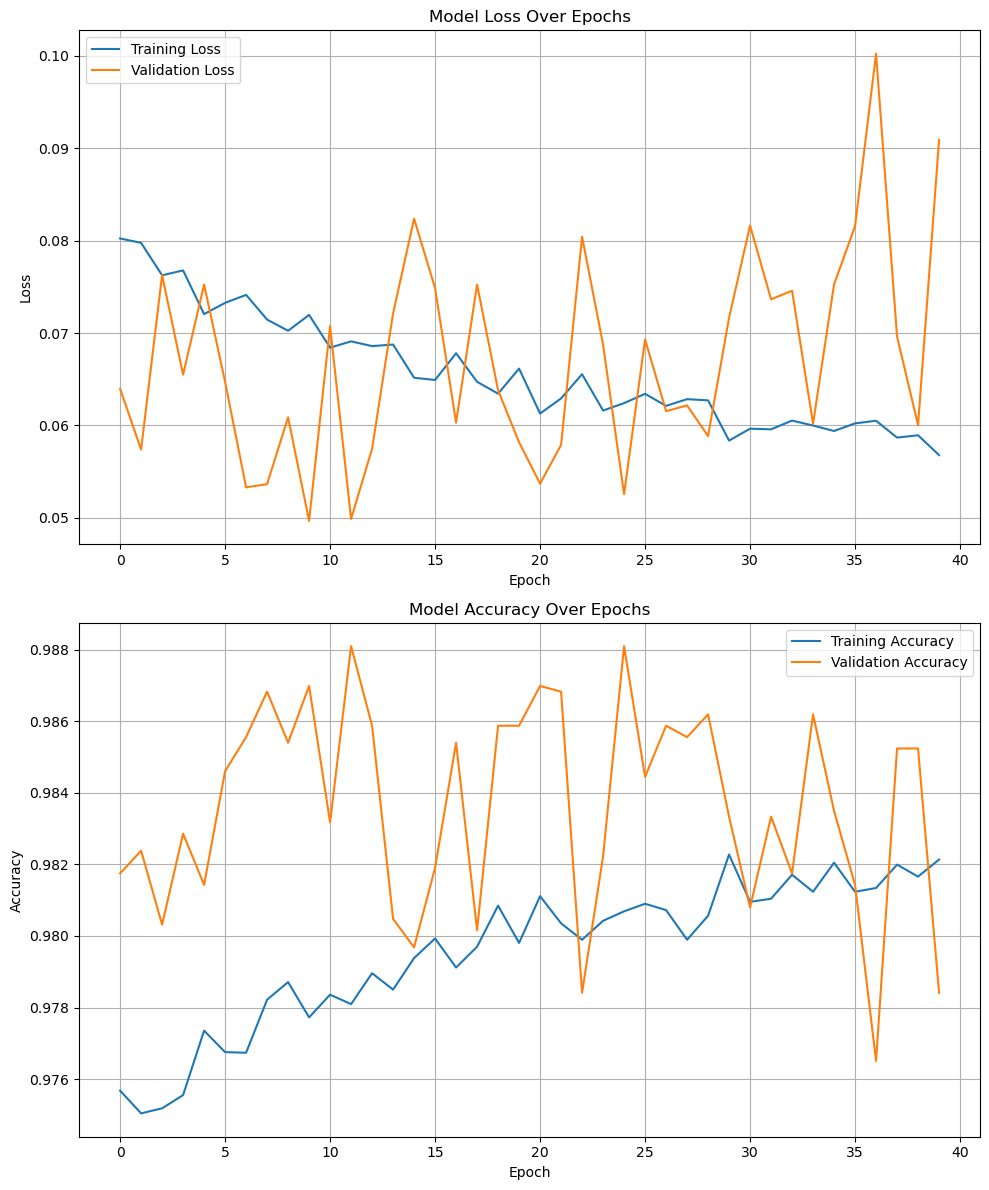

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume 'history' is the object returned from model.fit()
# Create a DataFrame from the history for easy plotting (optional but nice)
history_df = pd.DataFrame(history.history)

# Create a figure with two subplots, one on top of the other
# Hint: plt.subplots(nrows, ncols, figsize)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# --- Plot Loss ---
# Hint: Use ax1.plot() for both training and validation loss
# You can get the epoch numbers using history_df.index
ax1.plot(history_df.index, history_df['loss'], label='Training Loss')
ax1.plot(history_df.index, history_df['val_loss'], label='Validation Loss')
ax1.set_title('Model Loss Over Epochs')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid(True)

# --- Plot Accuracy ---
# Hint: Do the same for accuracy on ax2
ax2.plot(history_df.index, history_df['accuracy'], label='Training Accuracy')
ax2.plot(history_df.index, history_df['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Model Accuracy Over Epochs')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()
ax2.grid(True)

# Show the plots
plt.tight_layout() # Adjusts plots to prevent them from overlapping
plt.show()

In [16]:
epochs=60

history = model.fit(
  x=X_train_tensor,
  y=y_train_tensor,
  validation_data=(X_val_tensor,y_val_tensor),
  epochs=epochs
)

Epoch 1/60
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9820 - loss: 0.0580 - val_accuracy: 0.9843 - val_loss: 0.0714
Epoch 2/60
  67/1772 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.9756 - loss: 0.0771

1772/1772 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.9817 - loss: 0.0578 - val_accuracy: 0.9838 - val_loss: 0.0694
Epoch 3/60
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9829 - loss: 0.0554 - val_accuracy: 0.9822 - val_loss: 0.0802
Epoch 4/60
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.9819 - loss: 0.0590 - val_accuracy: 0.9779 - val_loss: 0.0929
Epoch 5/60
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9822 - loss: 0.0598 - val_accuracy: 0.9825 - val_loss: 0.0765
Epoch 6/60
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9837 - loss: 0.0549 - val_accuracy: 0.9822 - val_loss: 0.0721
Epoch 7/60
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.9825 - loss: 0.0591 - val_accuracy: 0.9817 - val_loss: 0.0807
Epoch 8/60
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9812 - loss: 0.0593 - val_accuracy: 0.9822 - val_loss: 0.0663
Epoch 9/60
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.9828 - loss: 0.05

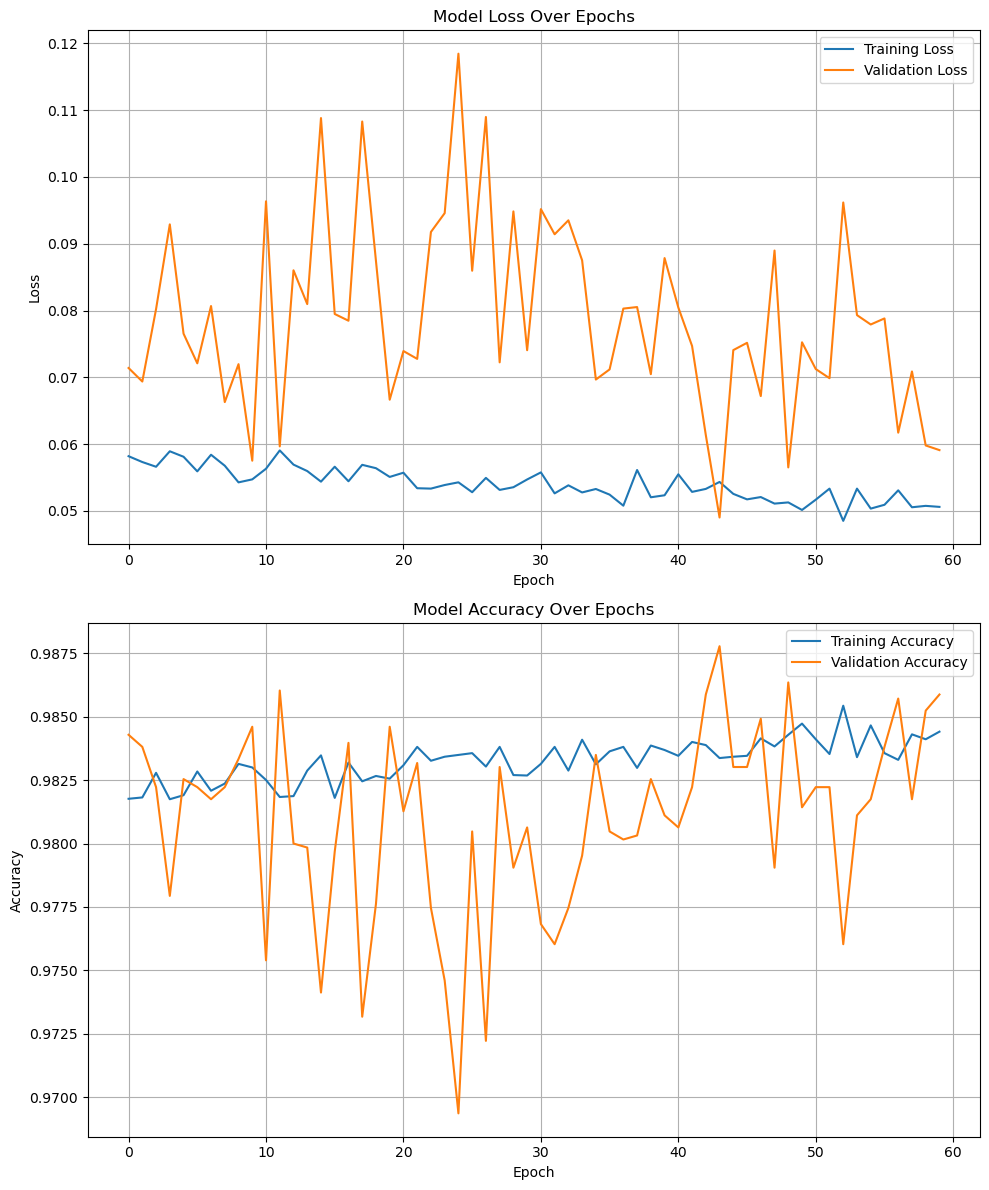

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume 'history' is the object returned from model.fit()
# Create a DataFrame from the history for easy plotting (optional but nice)
history_df = pd.DataFrame(history.history)

# Create a figure with two subplots, one on top of the other
# Hint: plt.subplots(nrows, ncols, figsize)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# --- Plot Loss ---
# Hint: Use ax1.plot() for both training and validation loss
# You can get the epoch numbers using history_df.index
ax1.plot(history_df.index, history_df['loss'], label='Training Loss')
ax1.plot(history_df.index, history_df['val_loss'], label='Validation Loss')
ax1.set_title('Model Loss Over Epochs')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid(True)

# --- Plot Accuracy ---
# Hint: Do the same for accuracy on ax2
ax2.plot(history_df.index, history_df['accuracy'], label='Training Accuracy')
ax2.plot(history_df.index, history_df['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Model Accuracy Over Epochs')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()
ax2.grid(True)

# Show the plots
plt.tight_layout() # Adjusts plots to prevent them from overlapping
plt.show()

## Lessons Learnt
* So one thing we learnt while learning these models was that `Keras` preserves the weights and biases of all the layers between different fit calls.  So when we thought we were testing 40 epochs we were actually testing 60 epochs, and when we thought we were testing 60 epochs we were actually testing 120. 
* From experiment point of view the model performense seems to degrade after 40 epochs but in the next section we'll run this experiment again but taking advantage of Keras call backs which would save the "best model" every `n` epochs. This will align more with how training is performed in production. 

## Experiment 3 - Long Training With Callbacks

In [18]:
## step 1: Initialize the model
model = tf.keras.Sequential([
    tf.keras.layers.RandomTranslation(
        height_factor=0.2, width_factor=0.2, fill_value=0.0, fill_mode="constant", seed=42),

    tf.keras.layers.RandomZoom(
        height_factor=0.2, width_factor=0.2, fill_value=0.0, fill_mode="constant", seed=42),

    tf.keras.layers.RandomRotation(
        factor=0.1, fill_value=0.0, fill_mode="constant", seed=42),

    tf.keras.layers.Rescaling(scale=1./255),

    tf.keras.layers.Conv2D(filters=8, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [19]:
## step 2: Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [21]:
## step 3: convert df to tensor
## convert df to tensor
X_train_tensor = tf.convert_to_tensor(X_train)
X_train_tensor = tf.reshape(X_train_tensor,shape=(-1,28,28,1))

y_train_tensor = tf.convert_to_tensor(y_train)
# y_train_tensor = tf.reshape(y_train_tensor,shape=(-1,28,28,1))

X_val_tensor = tf.convert_to_tensor(X_val)
X_val_tensor = tf.reshape(X_val_tensor,shape=(-1,28,28,1))

y_val_tensor = tf.convert_to_tensor(y_val)

In [22]:
# step 4: Define the callbacks
checkpoint_filepath = '../models/experiment_3_{epoch:02d}_{val_accuracy:.2f}.keras'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    save_freq="epoch",
    verbose=1,
    )

In [23]:
## step 5: Fit the model
epochs=200

history = model.fit(
  x=X_train_tensor,
  y=y_train_tensor,
  validation_data=(X_val_tensor,y_val_tensor),
  epochs=epochs,
  callbacks=[model_checkpoint_callback]
)

Epoch 1/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6198 - loss: 1.1145
Epoch 1: val_accuracy improved from -inf to 0.92825, saving model to ../models/experiment_3_01_0.93.keras
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.6199 - loss: 1.1143 - val_accuracy: 0.9283 - val_loss: 0.2324
Epoch 2/200
1769/1772 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9104 - loss: 0.2927
Epoch 2: val_accuracy improved from 0.92825 to 0.95143, saving model to ../models/experiment_3_02_0.95.keras
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.9104 - loss: 0.2926 - val_accuracy: 0.9514 - val_loss: 0.1496
Epoch 3/200
1770/1772 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9346 - loss: 0.2063
Epoch 3: val_accuracy improved from 0.95143 to 0.95571, saving model to ../models/experiment_3_03_0.96.keras
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.9346 - loss: 0.2063 - val_accuracy: 0.9557 - val_loss: 0.1546
Epoch 4/200
1768/1772 ━━━━━━━━━━━━━━━━━━━━ 

* Alright, so we finally have found a model with .99 accuracy, another mistake I made was to use `accuracy` as metric, in our earlier project we used `f1` score and would have helped to keep the metric consistant. 
* For now we'll continue with `accuracy` and observe the epocs, loss and accuracy fluctuations during trainig. 

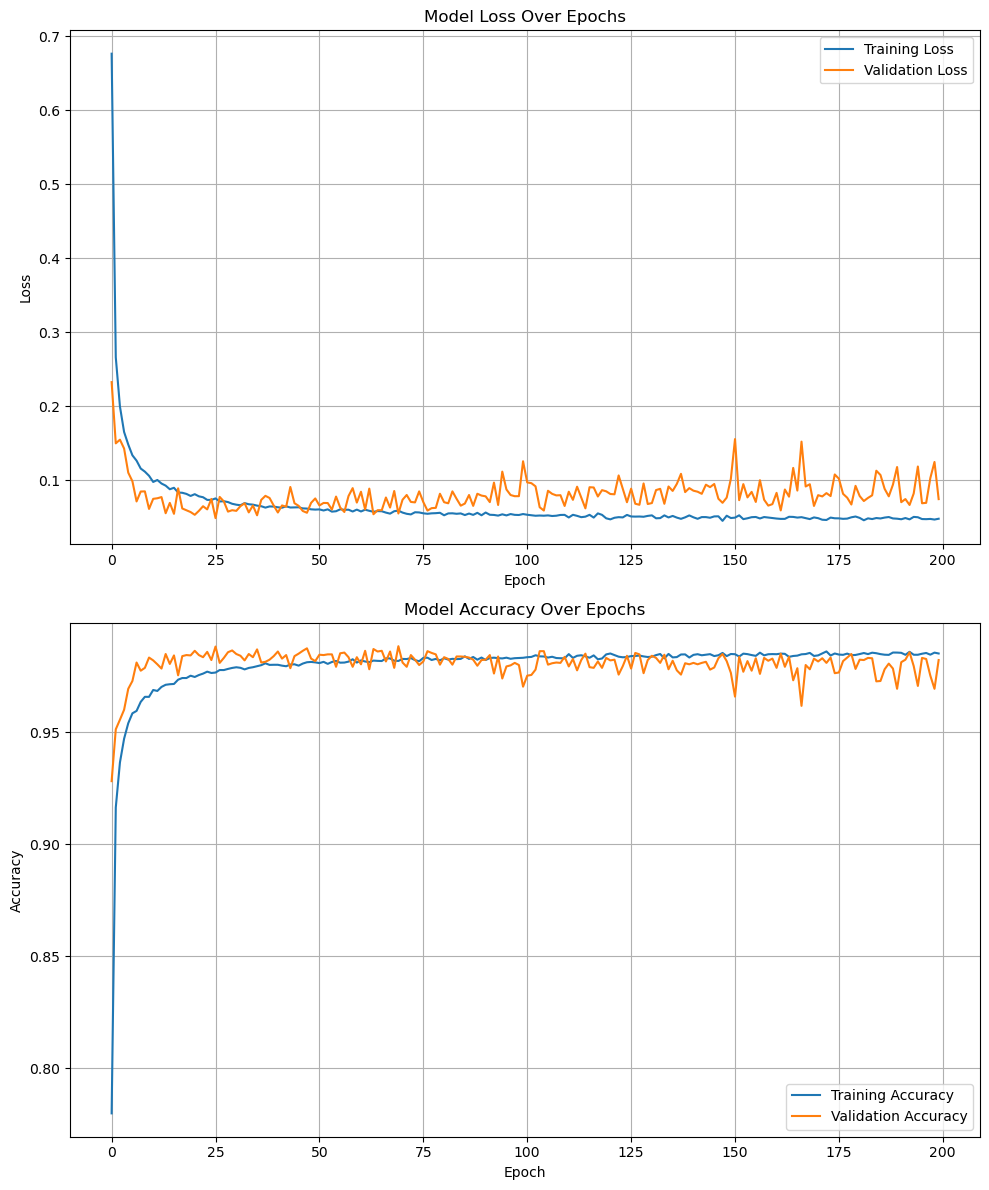

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume 'history' is the object returned from model.fit()
# Create a DataFrame from the history for easy plotting (optional but nice)
history_df = pd.DataFrame(history.history)

# Create a figure with two subplots, one on top of the other
# Hint: plt.subplots(nrows, ncols, figsize)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# --- Plot Loss ---
# Hint: Use ax1.plot() for both training and validation loss
# You can get the epoch numbers using history_df.index
ax1.plot(history_df.index, history_df['loss'], label='Training Loss')
ax1.plot(history_df.index, history_df['val_loss'], label='Validation Loss')
ax1.set_title('Model Loss Over Epochs')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid(True)

# --- Plot Accuracy ---
# Hint: Do the same for accuracy on ax2
ax2.plot(history_df.index, history_df['accuracy'], label='Training Accuracy')
ax2.plot(history_df.index, history_df['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Model Accuracy Over Epochs')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()
ax2.grid(True)

# Show the plots
plt.tight_layout() # Adjusts plots to prevent them from overlapping
plt.show()

* So according to the saved models and visualizations, we had the best model at the end of epoch 70 with .99 accuracy. 
* This signifies the fact we also need a early stopping call back, cause we ran 130 epochs with learning or improvement to the model. 
* The question remains how much patience should `early stopping` have, e.g. if we keep it to 20 we might stop before epoch 70 and **miss out** on improvement there. Although I think the improvement won't be significant.

In [25]:
history_df.head()

,accuracy,loss,val_accuracy,val_loss
0,0.779771,0.676534,0.928254,0.232442
1,0.916490,0.265938,0.951429,0.149635
2,0.936596,0.199513,0.955714,0.154610
3,0.947213,0.165012,0.960159,0.142649
4,0.954145,0.148059,0.969524,0.109999


In [29]:
history_df[history_df["val_accuracy"] >= 0.98]

,accuracy,loss,val_accuracy,val_loss
6,0.959647,0.126239,0.981270,0.071097
9,0.965926,0.105795,0.983492,0.060985
10,0.968995,0.097443,0.982222,0.074608
11,0.968571,0.100100,0.980476,0.075392
13,0.971323,0.092472,0.985079,0.055156
...,...,...,...,...
191,0.984727,0.048650,0.982540,0.074302
192,0.986049,0.046853,0.985873,0.066319
195,0.985203,0.047290,0.983333,0.068637
196,0.985538,0.047137,0.982857,0.069203


* Ok as suspected the difference between the accuracy is not too high. 
* Lets check the accuracy of all the saved models and see if our findings are correct. 

In [37]:
history_df.iloc[[0,1,2,3,4,5,6,9,13,20,25,69]].sort_values(by=["val_accuracy"],ascending=False)

,accuracy,loss,val_accuracy,val_loss
69,0.981975,0.058687,0.988571,0.054784
25,0.976790,0.075168,0.988413,0.048523
20,0.974815,0.080923,0.986508,0.053030
13,0.971323,0.092472,0.985079,0.055156
9,0.965926,0.105795,0.983492,0.060985
6,0.959647,0.126239,0.981270,0.071097
5,0.958571,0.133471,0.973016,0.098407
4,0.954145,0.148059,0.969524,0.109999
3,0.947213,0.165012,0.960159,0.142649
2,0.936596,0.199513,0.955714,0.154610


* So between top 4 performing models, the accuracy improvements is less than ~0.002, quite negligible in current context. 
* Based on this I think its safe to keep `patience` for EarlyStopping to 10 or 20. 
* Next lets load the top 5 models to measure F1 score, can class based f1 score for more detailed insight

### Metrics Evalaution

* Another good thing to keep in mind would be to avoid adding accuracy in the file names, makes it easier to load files based on just epoch numbers.

In [80]:
from sklearn.metrics import ConfusionMatrixDisplay, f1_score, roc_auc_score, roc_curve, accuracy_score

def map_model_performance(model_name):
    # step 1: load the model
    model = tf.keras.models.load_model(Path(models_dir, model_name))
    
    # step 2: Run predictions on validation set
    predictions = model.predict(X_val_tensor)
    
    # step 3: evaluate
    accuracy = accuracy_score(y_val, predictions.argmax(axis=1)) 
    f1= f1_score(y_val, predictions.argmax(axis=1), average="weighted")
    return {
        "name": model_name,
        "accuracy": accuracy,
        "f1_score": f1
    }

# best_model_epochs = history_df.sort_values(by=["val_accuracy"], ascending=False).iloc[0:5].index.values
# list of best models
model_file_names = ["experiment_3_70_0.99.keras", "experiment_3_26_0.99.keras",
                    "experiment_3_21_0.99.keras", "experiment_3_14_0.99.keras", "experiment_3_10_0.98.keras"]

performance = list(map(map_model_performance, model_file_names))
performance

197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[{'name': 'experiment_3_70_0.99.keras',
  'accuracy': 0.9885714285714285,
  'f1_score': 0.9885817077995456},
 {'name': 'experiment_3_26_0.99.keras',
  'accuracy': 0.9884126984126984,
  'f1_score': 0.9884171862210599},
 {'name': 'experiment_3_21_0.99.keras',
  'accuracy': 0.9865079365079366,
  'f1_score': 0.9865113655065318},
 {'name': 'experiment_3_14_0.99.keras',
  'accuracy': 0.9850793650793651,
  'f1_score': 0.9850723985754068},
 {'name': 'experiment_3_10_0.98.keras',
  'accuracy': 0.9834920634920635,
  'f1_score': 0.9835086887396858}]

In [81]:
performance_df = pd.DataFrame(performance)
performance_df

,name,accuracy,f1_score
0,experiment_3_70_0.99.keras,0.988571,0.988582
1,experiment_3_26_0.99.keras,0.988413,0.988417
2,experiment_3_21_0.99.keras,0.986508,0.986511
3,experiment_3_14_0.99.keras,0.985079,0.985072
4,experiment_3_10_0.98.keras,0.983492,0.983509


* So right now with `f1` score of .9885 the model performs at par with the SVN model that we trained earlier. 
* As an experiment we are going to add more layers to see how it affects the performance numbers. We do not expect it to improve any further since adding more layer will create more complex network which will mostly fight underfitting. Right now we don't have any proof for underfitting.

## Experiment 4 - Expanding number of layers in the model

* We are going to increase the number of conv layers in the network from 1 to 2 per layer. 

In [94]:
## step 1: Initialize the model
model = tf.keras.Sequential([
    tf.keras.layers.RandomTranslation(
        height_factor=0.2, width_factor=0.2, fill_value=0.0, fill_mode="constant", seed=42),

    tf.keras.layers.RandomZoom(
        height_factor=0.2, width_factor=0.2, fill_value=0.0, fill_mode="constant", seed=42),

    tf.keras.layers.RandomRotation(
        factor=0.1, fill_value=0.0, fill_mode="constant", seed=42),

    tf.keras.layers.Rescaling(scale=1./255),

    tf.keras.layers.Conv2D(filters=8, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(filters=8, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [95]:
## step 2: Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [96]:
## step 3: convert df to tensor
## convert df to tensor
X_train_tensor = tf.convert_to_tensor(X_train)
X_train_tensor = tf.reshape(X_train_tensor,shape=(-1,28,28,1))

y_train_tensor = tf.convert_to_tensor(y_train)
# y_train_tensor = tf.reshape(y_train_tensor,shape=(-1,28,28,1))

X_val_tensor = tf.convert_to_tensor(X_val)
X_val_tensor = tf.reshape(X_val_tensor,shape=(-1,28,28,1))

y_val_tensor = tf.convert_to_tensor(y_val)

In [ ]:
# step 4: Define the callbacks
checkpoint_filepath = '../models/experiment_4_{epoch:02d}.keras'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    save_freq="epoch",
    verbose=1,
    )

## stop training if loss doesn't decrease for 20 epochs
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='loss',patience=20)

In [86]:
## step 5: Fit the model
epochs=200

history = model.fit(
  x=X_train_tensor,
  y=y_train_tensor,
  validation_data=(X_val_tensor,y_val_tensor),
  epochs=epochs,
  callbacks=[model_checkpoint_callback,early_stopping_callback]
)

Epoch 1/200


W0000 00:00:1751316695.385499  252953 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1751316695.391662  252953 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1751316695.396459  252953 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1751316695.401259  252953 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1751316695.406081  252953 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1751316695.411025  252953 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1751316695.415963  252953 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1751316695.421662  252953 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1751316695.426586  252953 gp

   9/1772 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.0846 - loss: 2.3015

W0000 00:00:1751316695.586884  252953 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1751316695.591865  252953 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1751316695.595512  252953 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1751316695.599005  252953 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1751316695.600120  252953 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1751316695.601002  252953 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1751316695.605692  252948 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1751316695.606457  252948 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1751316695.607191  252948 gp

1770/1772 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6455 - loss: 1.0393

W0000 00:00:1751316721.292619  252952 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1751316721.294833  252952 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1751316721.296977  252952 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1751316721.299101  252952 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1751316721.301244  252952 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1751316721.303399  252952 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1751316721.305563  252952 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1751316721.308013  252952 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1751316721.310173  252952 gp

1772/1772 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6457 - loss: 1.0388

W0000 00:00:1751316721.493983  252952 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1751316721.496137  252952 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1751316721.498286  252952 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1751316721.500431  252952 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1751316721.502560  252952 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1751316721.503357  252952 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1751316721.505765  252952 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1751316721.506463  252952 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1751316721.507195  252952 gp


Epoch 1: val_accuracy improved from -inf to 0.94683, saving model to ../models/experiment_4_01.keras
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.6458 - loss: 1.0385 - val_accuracy: 0.9468 - val_loss: 0.1733
Epoch 2/200
1771/1772 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9283 - loss: 0.2241
Epoch 2: val_accuracy improved from 0.94683 to 0.96952, saving model to ../models/experiment_4_02.keras
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.9283 - loss: 0.2240 - val_accuracy: 0.9695 - val_loss: 0.0995
Epoch 3/200
1769/1772 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9487 - loss: 0.1630
Epoch 3: val_accuracy improved from 0.96952 to 0.97238, saving model to ../models/experiment_4_03.keras
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.9487 - loss: 0.1630 - val_accuracy: 0.9724 - val_loss: 0.0911
Epoch 4/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9609 - loss: 0.1237
Epoch 4: val_accuracy improved from 0.97238 to 0.98286, s

* So looks like minor improvement in the accuracy, nothing significant.

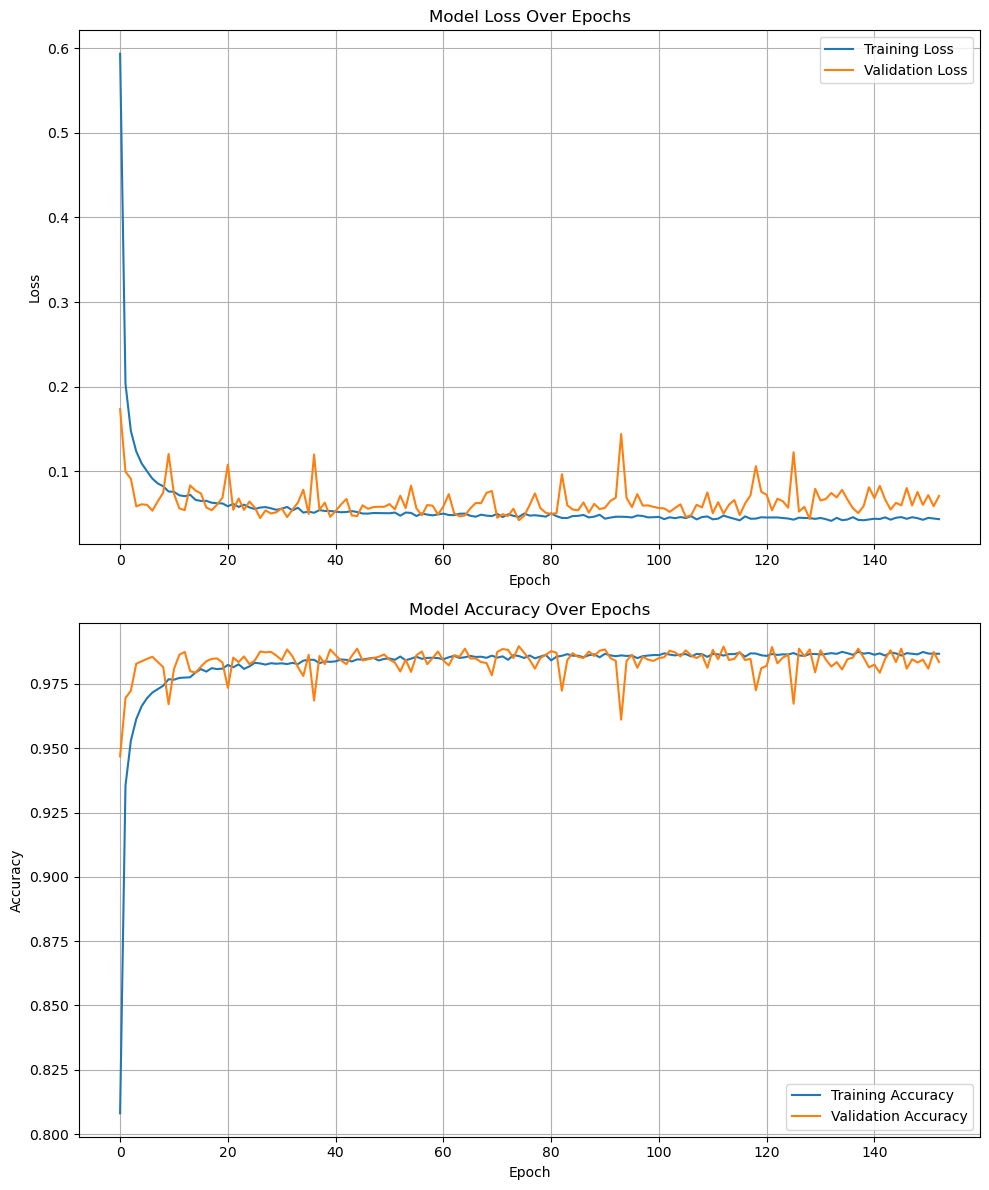

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume 'history' is the object returned from model.fit()
# Create a DataFrame from the history for easy plotting (optional but nice)
history_df = pd.DataFrame(history.history)

# Create a figure with two subplots, one on top of the other
# Hint: plt.subplots(nrows, ncols, figsize)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# --- Plot Loss ---
# Hint: Use ax1.plot() for both training and validation loss
# You can get the epoch numbers using history_df.index
ax1.plot(history_df.index, history_df['loss'], label='Training Loss')
ax1.plot(history_df.index, history_df['val_loss'], label='Validation Loss')
ax1.set_title('Model Loss Over Epochs')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid(True)

# --- Plot Accuracy ---
# Hint: Do the same for accuracy on ax2
ax2.plot(history_df.index, history_df['accuracy'], label='Training Accuracy')
ax2.plot(history_df.index, history_df['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Model Accuracy Over Epochs')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()
ax2.grid(True)

# Show the plots
plt.tight_layout() # Adjusts plots to prevent them from overlapping
plt.show()

In [99]:
history_df.sort_values(by=["val_accuracy"], ascending=False).iloc[0:5].index.values

array([ 74, 112, 121, 145,  44])

* Just learnt an important lesson, saving the best model takes a greedy approach. 
* Because of this we didn't save models at epoch 112, 121, 145, this is because these models are better than model from epoch 45 but not as good as epoch 75. 
* This works well, if we simply pick the best model, but if we want to analyze models for additional metrics we might end up loosing information on computationally expensive trained models. 
* A better approach would be to save all the models and then rely on early stopping to stop once the models stop improving and then analyze the models.
* For now we'll continue to analyze saved models and pick the best from them.

In [101]:

# list of best models
model_file_names = ["experiment_4_75.keras", "experiment_4_45.keras",
                    "experiment_4_32.keras", "experiment_4_27.keras", "experiment_4_13.keras"]

performance = list(map(map_model_performance, model_file_names))
performance

197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[{'name': 'experiment_4_75.keras',
  'accuracy': 0.9896825396825397,
  'f1_score': 0.989675951849358},
 {'name': 'experiment_4_45.keras',
  'accuracy': 0.9887301587301587,
  'f1_score': 0.9887369913656638},
 {'name': 'experiment_4_32.keras',
  'accuracy': 0.9884126984126984,
  'f1_score': 0.9884135631469043},
 {'name': 'experiment_4_27.keras',
  'accuracy': 0.9876190476190476,
  'f1_score': 0.9876142327977911},
 {'name': 'experiment_4_13.keras',
  'accuracy': 0.9874603174603175,
  'f1_score': 0.9874633458397035}]

,accuracy,loss,val_accuracy,val_loss
74,0.985855,0.045993,0.989683,0.042079
112,0.986032,0.047560,0.989524,0.049908
121,0.986649,0.045280,0.989365,0.053799
145,0.986014,0.045777,0.988730,0.059680
44,0.984550,0.051765,0.988730,0.047066


In [102]:
performance_df = pd.DataFrame(performance)
performance_df

,name,accuracy,f1_score
0,experiment_4_75.keras,0.989683,0.989676
1,experiment_4_45.keras,0.988730,0.988737
2,experiment_4_32.keras,0.988413,0.988414
3,experiment_4_27.keras,0.987619,0.987614
4,experiment_4_13.keras,0.987460,0.987463


* So again a slight improvement from previous version, but not a significant change. 
* After training multiple ML models and experimenting with CNN, I think its safe to conclude give the size and type of dataset a model with `Accuracy` and `F1 Score` of `0.99` is the best we can get.
* Any further improvement will require more data, more computation and even after that the scale of improvement will be very less. 

## Validating Against Test Data

* We'll just best models from experiment 3 and 4 to test against the test data. 

In [107]:

test_set = pd.read_csv(Path(data_dir,"test_set.csv"))
X_test = test_set.drop(columns=["class"])
y_test = test_set["class"]

X_test_tensor = tf.convert_to_tensor(X_test)
X_test_tensor = tf.reshape(X_test_tensor,shape=(-1,28,28,1))


def map_model_performance(model_name):
    # step 1: load the model
    model = tf.keras.models.load_model(Path(models_dir, model_name))
    
    # step 2: Run predictions on validation set
    predictions = model.predict(X_test_tensor)
    
    # step 3: evaluate
    accuracy = accuracy_score(y_test, predictions.argmax(axis=1)) 
    f1= f1_score(y_test, predictions.argmax(axis=1), average="weighted")
    return {
        "name": model_name,
        "accuracy": accuracy,
        "f1_score": f1
    }

# list of best models
model_file_names = ["experiment_4_75.keras", "experiment_3_70_0.99.keras"]

performance = list(map(map_model_performance, model_file_names))
performance

212/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

W0000 00:00:1751326535.183219  252957 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1751326535.187603  252957 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1751326535.191261  252957 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1751326535.194941  252957 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1751326535.198580  252957 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1751326535.202246  252957 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1751326535.205915  252957 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1751326535.209565  252957 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1751326535.213240  252957 gp

219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


W0000 00:00:1751326535.384305  252957 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1751326535.388095  252957 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1751326535.391927  252957 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1751326535.395663  252957 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1751326535.399414  252957 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1751326535.404623  252957 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1751326535.409184  252957 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1751326535.415706  252957 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1751326535.420126  252957 gp

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[{'name': 'experiment_4_75.keras',
  'accuracy': 0.9882857142857143,
  'f1_score': 0.9882903413636772},
 {'name': 'experiment_3_70_0.99.keras',
  'accuracy': 0.9872857142857143,
  'f1_score': 0.987293218285179}]

In [106]:
X_test.shape,y_test.shape

((7000, 784), (7000,))

* So we see similar performance even on test data, I think its safe to use these models for production. 
* We'll use `TensorFlow.js` to try and deploy this on the client

# Debugging Model Creating for TFJS
* In this section we are experimenting with various combination of file formats and model params to see which works while importing in TFJS. 
* Right now we are getting the following error in TFJS,
```
An InputLayer should be passed either a `batchInputShape` or an `inputShape`.
```

* We need to try following combinations of file types and params
    1. Using `keras.Input` to define the input shape along with `model.build` - Did not work
    2. Using `input_shape` param in `RandomTranslation` - Did Not Work
    3. Saving the file as `.keras` - Did Not work
    4. Saving the file as `.h5` - Did Not Work
    5. Using `tfjs.converters.save_keras_model` - Did Not Work
    6. Using `!tensorflowjs_converter --input_format="keras" "../models/experiment_4_01_temp.h5" ../tfjs/` - Did Not Work

## Prepare Input

In [8]:
## convert df to tensor
X_train_tensor = tf.convert_to_tensor(X_train)
X_train_tensor = tf.reshape(X_train_tensor,shape=(-1,28,28,1))

y_train_tensor = tf.convert_to_tensor(y_train)
# y_train_tensor = tf.reshape(y_train_tensor,shape=(-1,28,28,1))

X_val_tensor = tf.convert_to_tensor(X_val)
X_val_tensor = tf.reshape(X_val_tensor,shape=(-1,28,28,1))

y_val_tensor = tf.convert_to_tensor(y_val)

In [14]:
## step 1: Initialize the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)), 

    tf.keras.layers.RandomTranslation(
        height_factor=0.2, width_factor=0.2, fill_value=0.0, fill_mode="constant", seed=42, name="test2"),

    tf.keras.layers.RandomZoom(
        height_factor=0.2, width_factor=0.2, fill_value=0.0, fill_mode="constant", seed=42),

    tf.keras.layers.RandomRotation(
        factor=0.1, fill_value=0.0, fill_mode="constant", seed=42),

    tf.keras.layers.Rescaling(scale=1./255),

    tf.keras.layers.Conv2D(filters=8, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(filters=8, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.build(input_shape=(None, 28, 28, 1))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ test2 (RandomTranslation)       │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom_3 (RandomZoom)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_3               │ (None, 28, 28, 1)      │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_3 (Rescaling)         │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 28, 28, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 28, 28, 8)      │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 14, 14, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 14, 14, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 14, 14, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 7, 7, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 7, 7, 32)       │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 7, 7, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,322 (220.01 KB)

 Trainable params: 56,322 (220.01 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(x=X_train_tensor,
  y=y_train_tensor,
  validation_data=(X_val_tensor,y_val_tensor),epochs=2)

model.save(Path(models_dir,"exp_model_version_1.h5"))

Epoch 1/2


I0000 00:00:1752184512.310050   57068 cuda_dnn.cc:529] Loaded cuDNN version 90300


1772/1772 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.6509 - loss: 1.0176 - val_accuracy: 0.9543 - val_loss: 0.1552
Epoch 2/2
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 30s 17ms/step - accuracy: 0.9290 - loss: 0.2220 - val_accuracy: 0.9752 - val_loss: 0.0783


So the above version didn't work, lets fit and save again but this time as .keras file.

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(x=X_train_tensor,
  y=y_train_tensor,
  validation_data=(X_val_tensor,y_val_tensor),epochs=2)

model.save(Path(models_dir,"exp_model_version_2.keras"))

Epoch 1/2
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.6694 - loss: 0.9728 - val_accuracy: 0.9610 - val_loss: 0.1318
Epoch 2/2
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 28s 16ms/step - accuracy: 0.9305 - loss: 0.2226 - val_accuracy: 0.9794 - val_loss: 0.0707


So for this version, we got the same error when we used the model json produced by library and were not able to create model json using the cli tool

In [19]:
## step 1: Initialize the model
model = tf.keras.Sequential([
    tf.keras.layers.RandomTranslation(
        height_factor=0.2, width_factor=0.2, fill_value=0.0, fill_mode="constant", seed=42, name="test3", input_shape=(28,28,1), data_format="channels_last"),

    tf.keras.layers.RandomZoom(
        height_factor=0.2, width_factor=0.2, fill_value=0.0, fill_mode="constant", seed=42),

    tf.keras.layers.RandomRotation(
        factor=0.1, fill_value=0.0, fill_mode="constant", seed=42),

    tf.keras.layers.Rescaling(scale=1./255),

    tf.keras.layers.Conv2D(filters=8, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(filters=8, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.build(input_shape=(None, 28, 28, 1))

model.summary()

/home/gaurangdave/workspace/mnist_cnn/venv/lib/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ test3 (RandomTranslation)       │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom_6 (RandomZoom)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_6               │ (None, 28, 28, 1)      │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_6 (Rescaling)         │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 28, 28, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 28, 28, 8)      │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 14, 14, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 14, 14, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 14, 14, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 7, 7, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 7, 7, 32)       │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 7, 7, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,322 (220.01 KB)

 Trainable params: 56,322 (220.01 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(x=X_train_tensor,
  y=y_train_tensor,
  validation_data=(X_val_tensor,y_val_tensor),epochs=2)

model.save(Path(models_dir,"exp_model_version_3.h5"))

Epoch 1/2
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.6372 - loss: 1.0523 - val_accuracy: 0.9579 - val_loss: 0.1403
Epoch 2/2
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 30s 17ms/step - accuracy: 0.9283 - loss: 0.2313 - val_accuracy: 0.9721 - val_loss: 0.0854


Again same error for the above model

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(x=X_train_tensor,
  y=y_train_tensor,
  validation_data=(X_val_tensor,y_val_tensor),epochs=2)

model.save(Path(models_dir,"exp_model_version_3.keras"))

Epoch 1/2
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.6294 - loss: 1.0661 - val_accuracy: 0.9589 - val_loss: 0.1264
Epoch 2/2
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 30s 17ms/step - accuracy: 0.9253 - loss: 0.2386 - val_accuracy: 0.9679 - val_loss: 0.1109


In [23]:
model.save(models_dir, zipped=False)

* No success with this either.